# 📊 Анализ датасета Telco Customer Churn 
## https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data?select=WA_Fn-UseC_-Telco-Customer-Churn.csv
## Автоматический анализ пропусков, выбросов и характеристик данных

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Настройка отображения
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
print("✅ Библиотеки подключены")

✅ Библиотеки подключены


## 🔍 Загрузка данных и первичный осмотр


In [17]:
data_path = r'C:\Users\tryme\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1'

# Находим CSV файл
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
print(f"Найдено CSV файлов: {csv_files}")

if csv_files:
    file_path = os.path.join(data_path, csv_files[0])
    print(f"Загружаем: {file_path}")
    df = pd.read_csv(file_path)
else:
    file_path = os.path.join(data_path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
    df = pd.read_csv(file_path)

print(f"✅ Данные загружены: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("="*60)

Найдено CSV файлов: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']
Загружаем: C:\Users\tryme\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1\WA_Fn-UseC_-Telco-Customer-Churn.csv
✅ Данные загружены: 7043 строк, 21 столбцов


## Первичный осмотр

In [18]:
print("📋 СТРУКТУРА ДАННЫХ:")
print("="*60)

print("\n1. ОБЩАЯ ИНФОРМАЦИЯ:")
df.info()

print("\n2. ПЕРВЫЕ 3 СТРОКИ:")
print(df.head(3).to_string())

print("\n3. СТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print(df[numerical_cols].describe())
else:
    print("Числовых признаков не обнаружено")

📋 СТРУКТУРА ДАННЫХ:

1. ОБЩАЯ ИНФОРМАЦИЯ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  

## 🔍 ПРОВЕРКА ПРОПУСКОВ 

In [19]:
# ПРОВЕРКА ПРОПУСКОВ
print("\n❶ ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")
print("="*60)

# 1. Явные пропуски
print("\n1. ЯВНЫЕ ПРОПУСКИ (NaN):")
nan_counts = df.isna().sum()
if nan_counts.sum() > 0:
    print("Обнаружены NaN:")
    for col, count in nan_counts[nan_counts > 0].items():
        print(f"   {col}: {count} ({count/len(df)*100:.1f}%)")
else:
    print("✅ Явных пропусков нет")

# 2. Скрытые пропуски в TotalCharges
print("\n2. ПРОВЕРКА TotalCharges:")
print(f"   Тип данных: {df['TotalCharges'].dtype}")
total_charges_issues = df['TotalCharges'].str.strip().isin(['', ' ', 'NA', 'N/A'])
if total_charges_issues.any():
    print(f"   ⚠️  Проблемных значений: {total_charges_issues.sum()}")
    print(f"   Процент: {total_charges_issues.mean()*100:.2f}%")
else:
    print("   ✅ TotalCharges в порядке")


❶ ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:

1. ЯВНЫЕ ПРОПУСКИ (NaN):
✅ Явных пропусков нет

2. ПРОВЕРКА TotalCharges:
   Тип данных: object
   ⚠️  Проблемных значений: 11
   Процент: 0.16%


## 📊 Визуализация пропусков


ВИЗУАЛИЗАЦИЯ ПРОПУСКОВ:


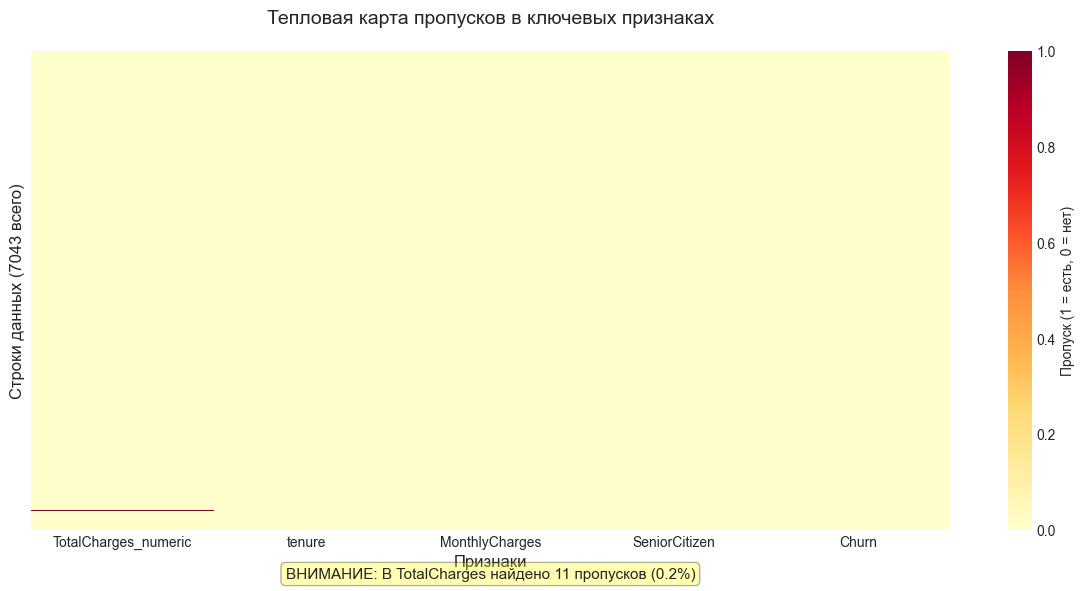


ИНТЕРПРЕТАЦИЯ ГРАФИКА:
----------------------------------------
• Жёлтые полосы = пропущенные значения
• Синие области = данные присутствуют
• TotalCharges_numeric - главная колонка с пропусками

Характеристики строк с пропусками в TotalCharges:
   • Всего строк: 11
   • Средний tenure: 0.0 месяцев
   • Минимальный tenure: 0 месяцев
   ВЫВОД: Все пропуски у новых клиентов (tenure=0). Логично заменить на 0.


In [ ]:
print("\nВИЗУАЛИЗАЦИЯ ПРОПУСКОВ:")
print("="*60)

# Подготовка данных для визуализации
df_viz = df.copy()

# Преобразуем TotalCharges (главная проблема с пропусками)
df_viz['TotalCharges_numeric'] = pd.to_numeric(
    df_viz['TotalCharges'].str.strip().replace('', np.nan), 
    errors='coerce'
)

# Создаем фигуру побольше для наглядности
plt.figure(figsize=(12, 6))

# Выбираем самые важные колонки для анализа
important_cols = ['TotalCharges_numeric', 'tenure', 'MonthlyCharges', 'SeniorCitizen', 'Churn']
df_important = df_viz[important_cols]

# Создаем тепловую карту пропусков
missing_matrix = df_important.isna()

sns.heatmap(missing_matrix, 
            cmap='YlOrRd', 
            cbar=True, 
            yticklabels=False,
            cbar_kws={'label': 'Пропуск (1 = есть, 0 = нет)'})

plt.title('Тепловая карта пропусков в ключевых признаках', fontsize=14, pad=20)
plt.xlabel('Признаки', fontsize=12)
plt.ylabel(f'Строки данных ({len(df)} всего)', fontsize=12)

# Добавляем аннотацию о TotalCharges (убрал warning sign)
if missing_matrix['TotalCharges_numeric'].any():
    missing_count = missing_matrix['TotalCharges_numeric'].sum()
    plt.text(0.5, -0.1, 
             f'ВНИМАНИЕ: В TotalCharges найдено {missing_count} пропусков ({missing_count/len(df)*100:.1f}%)',
             transform=plt.gca().transAxes,
             fontsize=11,
             ha='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.3))

plt.tight_layout()
plt.show()

# Текстовая сводка под графиком (убрал emoji)
print("\nИНТЕРПРЕТАЦИЯ ГРАФИКА:")
print("-" * 40)
print("• Жёлтые полосы = пропущенные значения")
print("• Синие области = данные присутствуют")
print("• TotalCharges_numeric - главная колонка с пропусками")

if missing_matrix['TotalCharges_numeric'].any():
    missing_rows = df_viz[df_viz['TotalCharges_numeric'].isna()]
    print(f"\nХарактеристики строк с пропусками в TotalCharges:")
    print(f"   • Всего строк: {len(missing_rows)}")
    print(f"   • Средний tenure: {missing_rows['tenure'].mean():.1f} месяцев")
    print(f"   • Минимальный tenure: {missing_rows['tenure'].min()} месяцев")
    
    if missing_rows['tenure'].max() == 0:
        print("   ВЫВОД: Все пропуски у новых клиентов (tenure=0). Логично заменить на 0.")

## ОСНОВНЫЕ ХАРАКТЕРИСТИКИ

In [21]:
print("\n" + "=" * 70)
print("📊 АНАЛИЗ ОСНОВНЫХ ХАРАКТЕРИСТИК")
print("=" * 70)

N = df.shape[0]
target_column = 'Churn'
id_columns = ['customerID']
feature_columns = [col for col in df.columns if col not in [target_column] + id_columns]
d = len(feature_columns)
K = df[target_column].nunique()

print(f"\nN (число объектов): {N:,}")
print(f"d (число признаков): {d}")
print(f"  • Числовые: {len(df[feature_columns].select_dtypes(include=[np.number]).columns)}")
print(f"  • Категориальные: {len(df[feature_columns].select_dtypes(include=['object']).columns)}")
print(f"K (количество классов): {K}")


📊 АНАЛИЗ ОСНОВНЫХ ХАРАКТЕРИСТИК

N (число объектов): 7,043
d (число признаков): 19
  • Числовые: 3
  • Категориальные: 16
K (количество классов): 2


## Анализ несбалансированности



2. АНАЛИЗ НЕСБАЛАНСИРОВАННОСТИ КЛАССОВ
----------------------------------------
Большинство класс: No (5,174)
Меньшинство класс: Yes (1,869)
Соотношение: 0.361


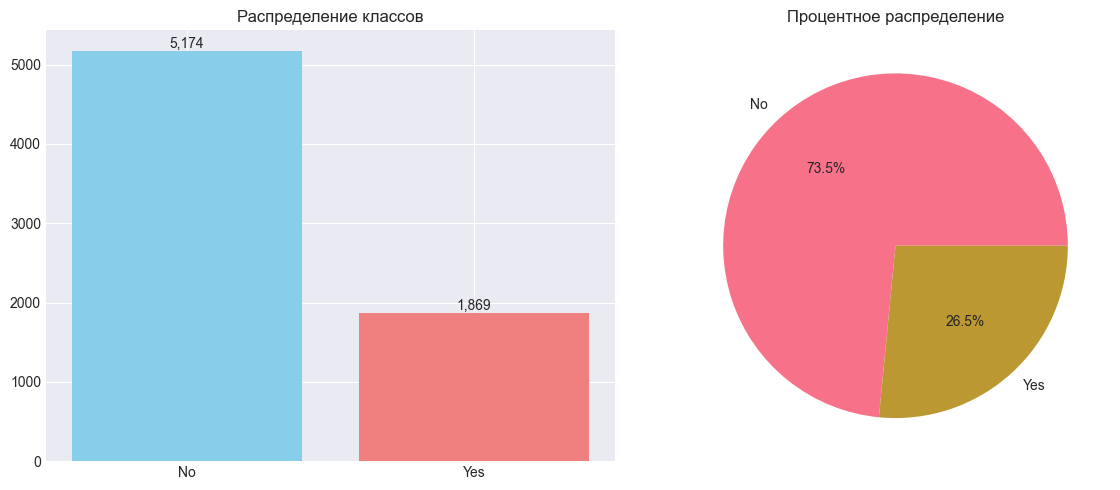

In [22]:
print("\n\n2. АНАЛИЗ НЕСБАЛАНСИРОВАННОСТИ КЛАССОВ")
print("-" * 40)

class_counts = df[target_column].value_counts()
majority_count = class_counts.max()
minority_count = class_counts.min()
imbalance_ratio = minority_count / majority_count

print(f"Большинство класс: {class_counts.idxmax()} ({majority_count:,})")
print(f"Меньшинство класс: {class_counts.idxmin()} ({minority_count:,})")
print(f"Соотношение: {imbalance_ratio:.3f}")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
bars = axes[0].bar(class_counts.index, class_counts.values, color=['skyblue', 'lightcoral'])
axes[0].set_title('Распределение классов')

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')

axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
axes[1].set_title('Процентное распределение')

plt.tight_layout()
plt.show()

## Анализ выбросов

In [23]:
print("\n\n3. АНАЛИЗ ВЫБРОСОВ")
print("-" * 40)

numeric_cols = df[feature_columns].select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols:
    print(f"Анализируем {len(numeric_cols)} числовых признаков:")
    
    total_outliers = 0
    for col in numeric_cols:
        if df[col].nunique() < 10:
            continue
            
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outliers_count = outliers.shape[0]
        
        if outliers_count > 0:
            print(f"\n  {col}: {outliers_count} выбросов")
            total_outliers += outliers_count
    
    avg_percentage = (total_outliers / (len(numeric_cols) * N)) * 100
    print(f"\nСредний процент выбросов: {avg_percentage:.1f}%")



3. АНАЛИЗ ВЫБРОСОВ
----------------------------------------
Анализируем 3 числовых признаков:

Средний процент выбросов: 0.0%


## Сводная таблица

In [24]:
print("\n" + "=" * 70)
print("📋 СВОДНАЯ ТАБЛИЦА")
print("=" * 70)

summary_data = {
    "Характеристика": ["N (число объектов)", "d (число признаков)", "K (количество классов)", 
                      "Несбалансированные классы", "Выбросы"],
    "Значение": [f"{N:,}", str(d), str(K), 
                f"{minority_count/N*100:.1f}% / {majority_count/N*100:.1f}%",
                f"{avg_percentage:.1f}%"]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False, justify='left'))

print("\n" + "=" * 70)
print("✅ АНАЛИЗ ЗАВЕРШЕН")


📋 СВОДНАЯ ТАБЛИЦА
Характеристика            Значение     
       N (число объектов)         7,043
      d (число признаков)            19
   K (количество классов)             2
Несбалансированные классы 26.5% / 73.5%
                  Выбросы          0.0%

✅ АНАЛИЗ ЗАВЕРШЕН
